# Step 1 – Data Loading and Exploration in R.

**Step 1.1: Load Required Libraries**

In [2]:
library(readr)       # For reading CSV files
library(dplyr)       # For data manipulation
library(ggplot2)     # For visualization
library(summarytools) # For quick summaries

**Step 1.2: Load Dataset**

In [6]:
loan_data <- read_csv("/kaggle/input/bank-loan-data/loan_data.csv")

Rows: 45000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): person_gender, person_education, person_home_ownership, loan_intent...
dbl (9): person_age, person_income, person_emp_exp, loan_amnt, loan_int_rate...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Step 1.3: View Dataset Structure**

In [7]:
glimpse(loan_data)

Rows: 45,000
Columns: 14
$ person_age                     <dbl> 22, 21, 25, 23, 24, 21, 26, 24, 24, 21,…
$ person_gender                  <chr> "female", "female", "female", "female",…
$ person_education               <chr> "Master", "High School", "High School",…
$ person_income                  <dbl> 71948, 12282, 12438, 79753, 66135, 1295…
$ person_emp_exp                 <dbl> 0, 0, 3, 0, 1, 0, 1, 5, 3, 0, 0, 0, 3, …
$ person_home_ownership          <chr> "RENT", "OWN", "MORTGAGE", "RENT", "REN…
$ loan_amnt                      <dbl> 35000, 1000, 5500, 35000, 35000, 2500, …
$ loan_intent                    <chr> "PERSONAL", "EDUCATION", "MEDICAL", "ME…
$ loan_int_rate                  <dbl> 16.02, 11.14, 12.87, 15.23, 14.27, 7.14…
$ loan_percent_income            <dbl> 0.49, 0.08, 0.44, 0.44, 0.53, 0.19, 0.3…
$ cb_person_cred_hist_length     <dbl> 3, 2, 3, 2, 4, 2, 3, 4, 2, 3, 4, 2, 2, …
$ credit_score                   <dbl> 561, 504, 635, 675, 586, 532, 701, 585,…
$ previous_loan

**Step 1.4: Summary of Numeric Columns**

In [8]:
summary(loan_data)

   person_age     person_gender      person_education   person_income    
 Min.   : 20.00   Length:45000       Length:45000       Min.   :   8000  
 1st Qu.: 24.00   Class :character   Class :character   1st Qu.:  47204  
 Median : 26.00   Mode  :character   Mode  :character   Median :  67048  
 Mean   : 27.76                                         Mean   :  80319  
 3rd Qu.: 30.00                                         3rd Qu.:  95789  
 Max.   :144.00                                         Max.   :7200766  
 person_emp_exp   person_home_ownership   loan_amnt     loan_intent       
 Min.   :  0.00   Length:45000          Min.   :  500   Length:45000      
 1st Qu.:  1.00   Class :character      1st Qu.: 5000   Class :character  
 Median :  4.00   Mode  :character      Median : 8000   Mode  :character  
 Mean   :  5.41                         Mean   : 9583                     
 3rd Qu.:  8.00                         3rd Qu.:12237                     
 Max.   :125.00                 

**Step 1.5: Check Missing Values**

In [9]:
colSums(is.na(loan_data))

person_age                  person_gender 
                             0                              0 
              person_education                  person_income 
                             0                              0 
                person_emp_exp          person_home_ownership 
                             0                              0 
                     loan_amnt                    loan_intent 
                             0                              0 
                 loan_int_rate            loan_percent_income 
                             0                              0 
    cb_person_cred_hist_length                   credit_score 
                             0                              0 
previous_loan_defaults_on_file                    loan_status 
                             0                              0

**Step 1.6: Basic Data Overview**

In [10]:
head(loan_data, 10)

person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
21,female,High School,12951,0,OWN,2500,VENTURE,7.14,0.19,2,532,No,1
26,female,Bachelor,93471,1,RENT,35000,EDUCATION,12.42,0.37,3,701,No,1
24,female,High School,95550,5,RENT,35000,MEDICAL,11.11,0.37,4,585,No,1
24,female,Associate,100684,3,RENT,35000,PERSONAL,8.90,0.35,2,544,No,1


**Step 1.7: Visualize Distributions**

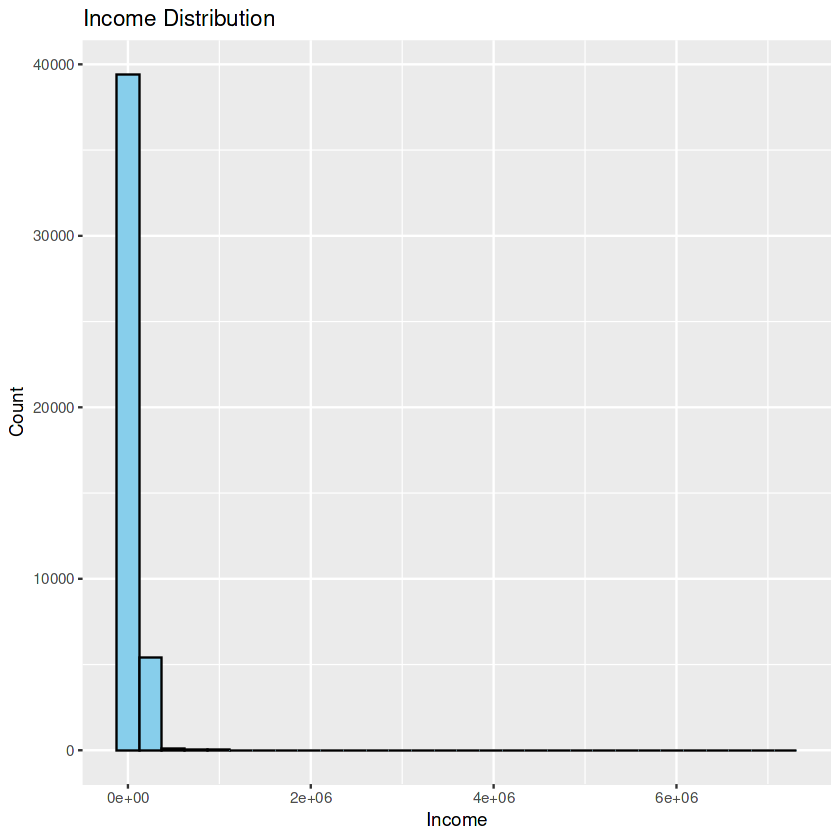

In [13]:
ggplot(loan_data, aes(x = person_income)) +
  geom_histogram(fill = "skyblue", color = "black", bins = 30) +
  labs(title = "Income Distribution", x = "Income", y = "Count")

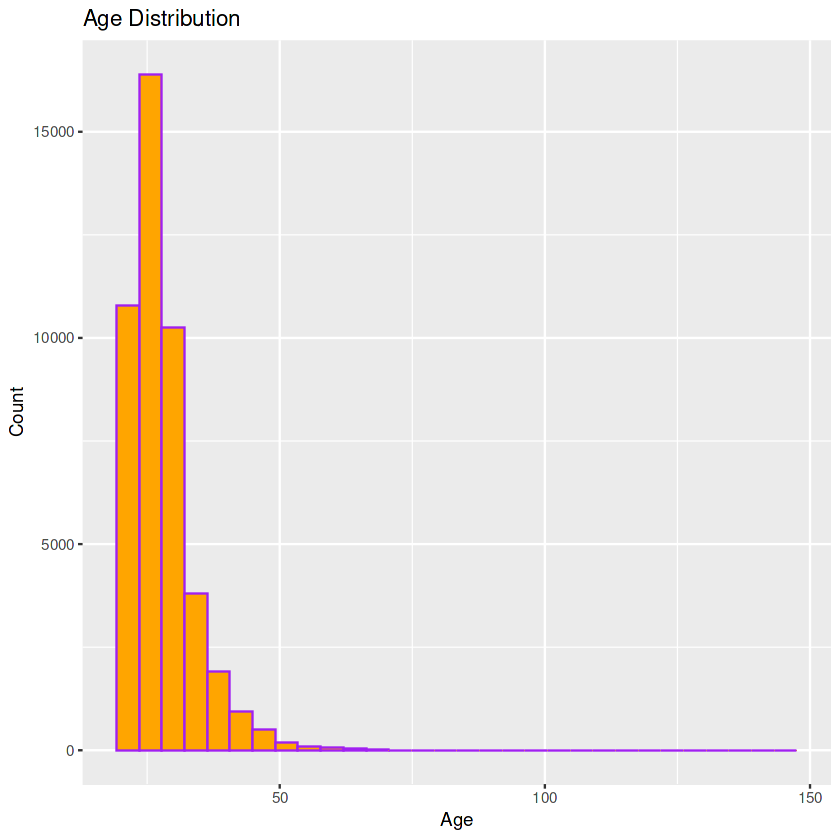

In [15]:
ggplot(loan_data, aes(x = person_age)) +
  geom_histogram(fill = "orange", color = "purple", bins = 30) +
  labs(title = "Age Distribution", x = "Age", y = "Count")

**Step 1.8: Risk Class Proportion**

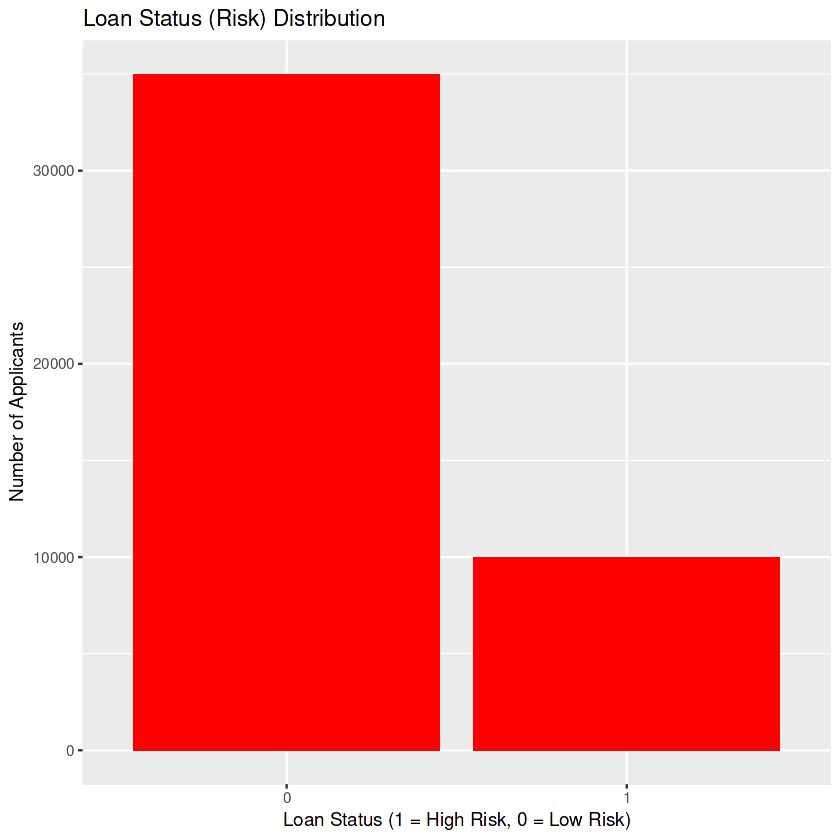

In [25]:
ggplot(loan_data, aes(x = as.factor(loan_status))) +
  geom_bar(fill = "red") +
  labs(title = "Loan Status (Risk) Distribution",
       x = "Loan Status (1 = High Risk, 0 = Low Risk)",
       y = "Number of Applicants")